In [2]:
import pandas as pd
import numpy as np
from  IPython.display import display
import matplotlib.pyplot as plt
from sys import version_info
if version_info.major !=3:
    raise Exception('please use Python3 to complete this task')

In [21]:
%matplotlib inline
lianjia_df = pd.read_csv('lianjia.csv')
display(lianjia_df.head())

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988
2,南西,崇文门,有电梯,16,新世界中心,101102672743,3室1厅,1400.0,东城,其他,210.0,1996
3,南,崇文门,NaN,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,2004
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,2010


In [22]:
to_drop = ['Id','Direction','Elevator','Renovation']
lianjia_df_clean = lianjia_df.drop(to_drop,axis=1)

In [36]:
columns= ['Region','District','Garden','Layout','Floor','Year','Size','Price']
lianjia_total_sum = pd.DataFrame(lianjia_df_clean,columns=columns)
lianjia_total_num = lianjia_df_clean['Floor'].count()

In [37]:
print(lianjia_df.shape,lianjia_total_num)

(23677, 12) 23677


In [35]:
anjuke_df =  pd.read_csv('anjuke.csv')
display(anjuke_df.head())
anjuke_df['District']=anjuke_df['Region'].str.extract(r'.+?-(.+?)-.+?',expand=False)
anjuke_df['Region']=anjuke_df['Region'].str.extract(r'(.+?)-.+?',expand=False)
anjuke_df = pd.DataFrame(anjuke_df,columns=columns)
print(anjuke_df.shape)


,Floor,Garden,Layout,Price,Region,Size,Year
0,25,兴达公寓,2室2厅,107.0,通州-马驹桥-科,76,2017
1,13,中铁华侨城和园,4室2厅,750.0,大兴-瀛海镇-公,136,2017
2,6,北营房小区,3室1厅,600.0,西城-阜成门-北,66,1988
3,22,首开璞瑅,3室2厅,698.0,丰台-方庄-方,102,2017
4,3,丽京花园,2室2厅,613.0,顺义-天竺-首,153,1999


(3000, 8)


In [39]:
df = pd.merge(lianjia_total_sum,anjuke_df,how='outer')
df['PriceMs']=df['Price']/df['Size']
df.dropna(how='any')
df.drop_duplicates(keep='first',inplace=True)
df = df.loc[df['PriceMs']<25]
print(df.shape)

(24281, 9)


In [53]:
df_house_count = df.groupby('Region')['Price'].count().sort_values(ascending=False)
df_house_mean = df.groupby('Region')['PriceMs'].mean().sort_values(ascending=False)
def auto_xticks(rects, xticks):
    x = []
    for rect in rects:
        x.append(rect.get_x()+rect.get_width()/2)
    x=tuple(x)
    plt.xticks(x,xticks)
    
def auto_tag(rects,data=None,offset = [0,0],size=14):
    for rect in rects:
        try:
            height = rect.get_height()
            plt.text(rect.get_x()+rect.get_width()/2.4, 1.01*height, '%s' % int(height), fontsize=size)
        except AttributeError:
            x = range(len(data))
            y = data.values
            for i in range(len(x)):
                plt.text(x[i]+offset[0],y[i]+0.05+offset[1],y[i],fontsize='14')
                
def auto_tag_float(rects,data=None,offset=[0,0],size=14):
    for rect in rects:
        try:
            height = rect.get_height()
            plt.text(rect.get_x()+rect.get_width()/2.4, 1.01*height, '%s' % round(float(height),1), fontsize=size)
        except AttributeError:
            x = range(len(data))
            y = data.values
            for i in range(len(x)):
                plt.text(x[i]+offset[0],y[i]+0.05+offset[1],y[i], fontsize='14')

/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-package

/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 21508 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20010 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22495 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 23545 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0, flags=flags)


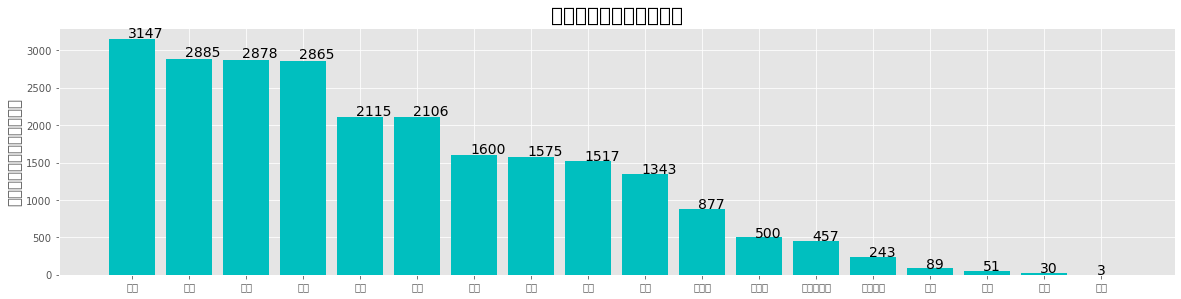

/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26684 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/ma

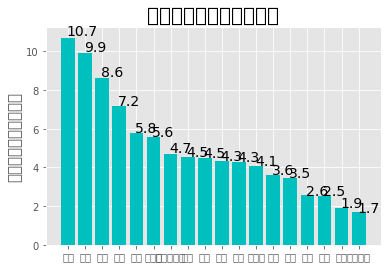

In [54]:
plt.figure(figsize=(20,10))
plt.rc('font',family='SimHei',size=13)
plt.style.use('ggplot')
plt.subplot(212)
plt.title(u'各个区域二手房数量对比',fontsize=20)
plt.ylabel(u'二手房总数量（单位：间）',fontsize=15)
rect1 = plt.bar(np.arange(len(df_house_count.index)),df_house_count.values,color='c')
auto_xticks(rect1,df_house_count.index)
auto_tag(rect1,offset= [-1,0])

plt.figure(211)
plt.title(u'各个区域二手房均价对比',fontsize=20)
plt.ylabel(u'二手房平均价格：间）',fontsize=15)
rect2= plt.bar(np.arange(len(df_house_mean.index)),df_house_mean.values,color='c')
auto_xticks(rect2,df_house_mean.index)
auto_tag_float(rect2,offset=[-1,0])


/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25163 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-package

/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 30707 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26223 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 38376 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22836 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 27807 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotl

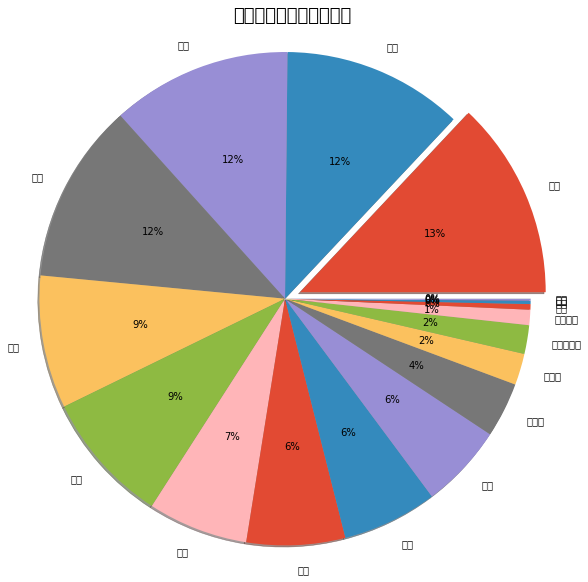

In [56]:
plt.figure(figsize=(10,10))
plt.title(u'各区域二手房数量百分比', fontsize=18)
explode = [0]*len(df_house_count)
explode[0]=0.2
plt.pie(df_house_count,radius=3,autopct='%1.f%%',shadow=True,labels = df_house_count.index,explode=explode)
plt.axis('equal')
plt.show()

In [66]:
def get_price_range(price,base=100):
    return '{0}-{1}'.format(int(price//base)*base,int(price//base)*base+base)
def get_size_range(size,base=30):
    return '{0}-{1}'.format(int(size//base)*base,int(size//base)*base+base)

In [69]:
df['GroupPrice']=df['Price'].apply(get_price_range)
df['GroupPriceSplit']=df['GroupPrice'].str.extract('(\d+)-\d+',expand=False)
df['GroupPriceSplit']=df['GroupPriceSplit'].astype('int')
sort_by_price_range = df.loc[df['GroupPriceSplit']<1000,['GroupPrice','Price','GroupPriceSplit']]
sort_by_price_range.set_index('GroupPrice',inplace=True)
sort_by_price_range.sort_values(by='GroupPriceSplit',inplace=True)

In [72]:
df['GroupSize']=df['Size'].apply(get_size_range)
df['GroupSizeSplit']=df['GroupSize'].str.extract('(\d+)-\d+',expand=False)
df['GroupSizeSplit']=df['GroupSizeSplit'].astype('int')
sort_by_size_range = df.loc[df['GroupSizeSplit']<300,['GroupSize','Size','GroupSizeSplit']]
sort_by_size_range.set_index('GroupSize',inplace=True)
sort_by_size_range.sort_values(by='GroupSizeSplit',inplace=True)

In [81]:
df_group_price = sort_by_price_range.groupby('GroupPrice')['Price'].count()
df_group_size = sort_by_size_range.groupby('GroupSizeSplit')['Size'].count()


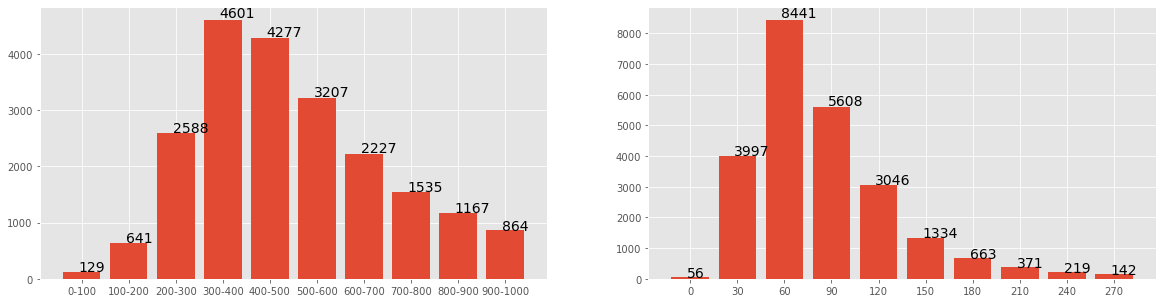

In [82]:
fig_group_price = plt.figure(figsize=(20,5))
plt.subplot(121)
rect_group_price = plt.bar(np.arange(len(df_group_price.index)),df_group_price.values)
auto_xticks(rect_group_price,df_group_price.index)
auto_tag(rect_group_price,offset=[-1,0])
plt.subplot(122)
rect_group_size = plt.bar(np.arange(len(df_group_size.index)),df_group_size.values)
auto_xticks(rect_group_size,df_group_size.index)
auto_tag(rect_group_size,offset=[-1,0])

/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 37329 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 34701 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 34903 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-package

/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 37329 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 34701 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 34903 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 35199 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 30452 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotl

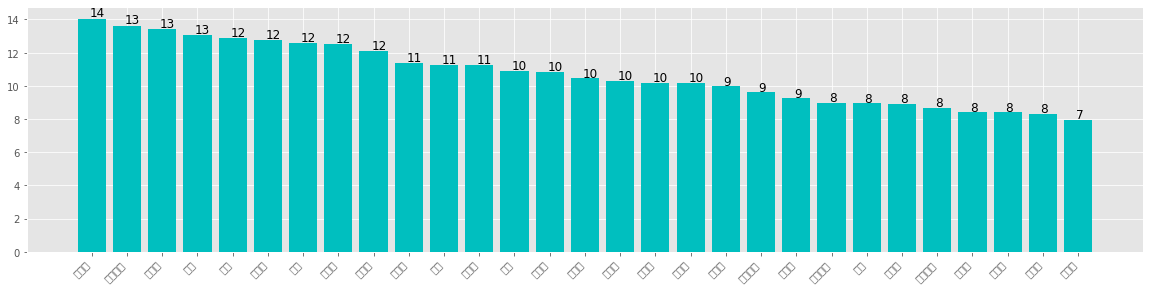

In [84]:
df_xicheng = df.loc[df['Region']=='西城']
df_haidian = df.loc[df['Region']=='海淀']

fig1 = plt.figure(figsize=(20,5))
df_xicheng = df_xicheng.groupby('District')['PriceMs'].mean().sort_values(ascending=False)
rect3 = plt.bar(np.arange(len(df_xicheng.index)),df_xicheng.values,color='c')
auto_xticks(rect3,df_xicheng.index)
auto_tag(rect3,offset=[-1,0],size=12)
fig1.autofmt_xdate(rotation=45)

/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19975 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20851 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-package

/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 19975 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26611 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20851 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26449 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/matplotl

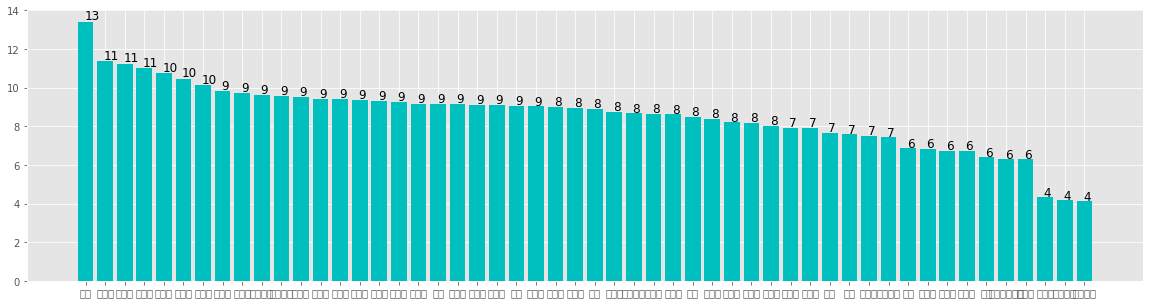

In [85]:
fig2= plt.figure(figsize=(20,5))
df_haidian = df_haidian.groupby('District')['PriceMs'].mean().sort_values(ascending=False)
rect4 = plt.bar(np.arange(len(df_haidian.index)),df_haidian.values,color='c')
auto_xticks(rect4,df_haidian.index)
auto_tag(rect4,offset=[-1,0],size=12)
fig1.autofmt_xdate(rotation=45)

In [94]:
drop_out = ['Garden','Id','District','Direction']
data = lianjia_df.drop(drop_out,axis=1)
loc_map = {'东城':1, '西城':2, '朝阳':3, '海淀':4, '丰台':5, '石景山':6, '通州':7, '昌平':8, '大兴':9, '亦庄开发区':10,'顺义':11, '房山':12, '门头沟':13, '平谷':14, '怀柔':15, '密云':16, '延庆':17, '燕郊':18, '香河':19}
renovation_map = {'简装':0, '精装':1, '其它':2}
elevator_map = {'有电梯':1, '无电梯':0}


In [95]:
data.shape

(23677, 8)

In [96]:
data['Region']= data['Region'].map(loc_map)
data['Renovation']=data['Renovation'].map(renovation_map)
data['Elevator']=data['Elevator'].map(elevator_map)
data['Layout']=data['Layout'].str.extract('(^\d).*',expand=False)
data=data.dropna(how='any')

In [97]:
columns1 = ['Region', 'Layout', 'Floor', 'Elevator', 'Renovation', 'Year', 'Size', 'Price']

data= pd.DataFrame(data,columns=columns1)
prices = data['Price']
features = data.drop('Price',axis=1)
data.head()


,Region,Layout,Floor,Elevator,Renovation,Year,Size,Price
1,1,2,6,0.0,1.0,1988,60.0,705.0
4,1,2,19,1.0,1.0,2010,90.0,998.0
8,1,3,9,1.0,1.0,2003,161.0,1780.0
9,1,2,25,1.0,1.0,2002,127.0,1300.0
10,1,1,5,0.0,1.0,1986,37.0,405.0


In [98]:
import numpy as np
features = np.array(features)
prices = np.array(prices)
from sklearn.model_selection import train_test_split
features_train , features_test, prices_train,prices_test = train_test_split(features,prices,test_size=0.2,random_state=0)

In [108]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
def performance_metric(y_true,y_predict):
    from sklearn.metrics import r2_score
    score = r2_score(y_true,y_predict)
    return score
def fit_model(X,y):
    cross_validator = KFold(10,shuffle=True)
    regressor = DecisionTreeRegressor()
    params = {"max_depth":[1,2,3,4,5,6,7,8,9,10]}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(estimator=regressor,param_grid=params,scoring=scoring_fnc,cv=cross_validator)
    grid = grid.fit(X,y)
    return grid.best_estimator_
    

/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2

/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
/Users/yanshuo/Downloads/git/2021/202106/visual.py:71: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  "        ax.set_ylabel('r2_score')\n",


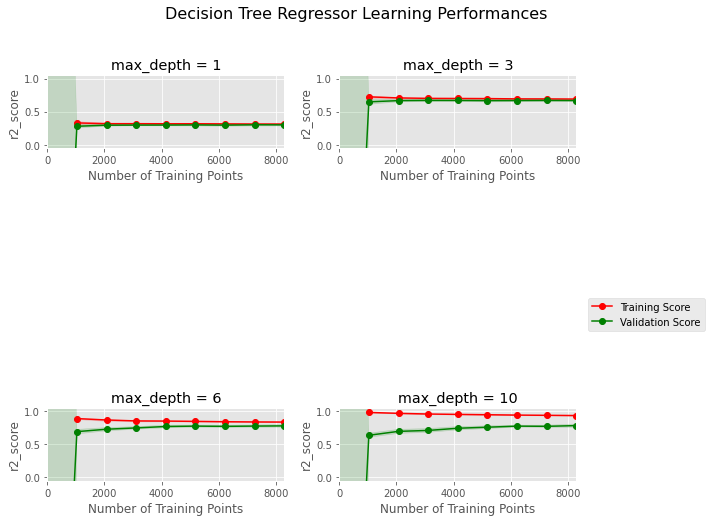

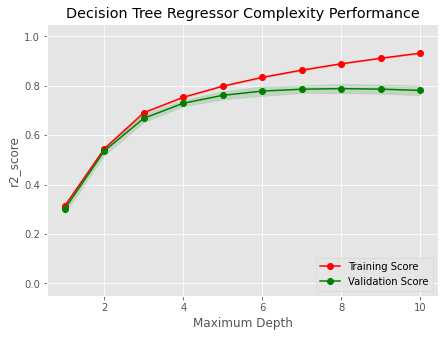

In [117]:
import visual as vs

# 分析模型
vs.ModelLearning(features_train, prices_train)
vs.ModelComplexity(features_train, prices_train)

optimal_reg1 = fit_model(features_train, prices_train)
optimal_reg1 = fit_model(features_train, prices_train)

In [123]:
print(optimal_reg1.get_params())
predict = optimal_reg1.predict(features_test)
r2 = performance_metric(prices_test,predict)
print(r2)

{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
0.7871301041955061


In [125]:
from math import radians, cos, sin, asin, sqrt
 
def spot_distance(lon1, lat1, lon2, lat2): # 经度1，纬度1，经度2，纬度2
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2]) #弧度转换
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # 地球平均半径，单位为公里
    return c * r * 1000  #米  不乘以1000就是公里

In [128]:
print(spot_distance(120.12802999999997,30.28708,115.86572000000001,28.7427))

446720.7270095995


In [130]:
import numpy as np
np.random.seed(1234)
x = np.random.rand(500,3)
y = x.dot(np.array([4.2,5.7,10.8]))



In [133]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
lr = LinearRegression(fit_intercept=True)
lr.fit(x,y)
print(lr.coef_)
print(lr.intercept_)

[ 4.2  5.7 10.8]
1.7763568394002505e-15


In [136]:
print(lr.score(x,y))
x_test = np.array([4,5,7]).reshape(1,-1)
y_hat = lr.predict(x_test)
print(x_test.dot(np.array([4.2,5.7,10.8])))
print(y_hat)

1.0
[120.9]
[120.9]


In [139]:
class LR_LS():
    def __init__(self):
        self.w= None
    def fit(self,X,y):
        self.w=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    def predict(self,X):
        y_pred = X.dot(self.w)
        return y_pred
    
if __name__ == "__main__":
    lr_ls = LR_LS()
    lr_ls.fit(x,y)
    print("估计的参数值：%s" %(lr_ls.w))
    x_test = np.array([4,5,7]).reshape(1,-1)
    print('真实值为：',x_test.dot(np.array([4.2,5.7,10.8])))
    print("预测值为: %s" %(lr_ls.predict(x_test)))

估计的参数值：[ 4.2  5.7 10.8]
真实值为： [120.9]
预测值为: [120.9]


In [140]:
class LR_GD():
    def __init__(self):
        self.w=None
    def fit(self,X,y,alpha=0.002,loss=1e-10):
        y = y.reshape(-1,1)
        [m,d]= np.shape(X)
        self.w = np.zeros((d))
        tol = 1e5
        while tol >loss:
            h_f = X.dot(self.w).reshape(-1,1)
            theta = self.w + alpha*np.mean(X*(y-h_f),axis=0)
            tol = np.sum(np.abs(theta-self.w))
            self.w = theta
    def predict(self,X):
        y_pred = X.dot(self.w)
        return y_pred
if __name__ == "__main__":
    lr_gd = LR_GD()
    lr_gd.fit(x,y)
    print("估计的参数值为：%s" %(lr_gd.w))
    x_test = np.array([4,5,7]).reshape(1,-1)
    print('真实值为：',x_test.dot(np.array([4.2,5.7,10.8])))
    print("预测值为：%s" %(lr_gd.predict(x_test))) 

估计的参数值为：[ 4.20000005  5.70000027 10.79999967]
真实值为： [120.9]
预测值为：[120.89999924]


In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter
import math


In [144]:
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data,columns=iris.feature_names)
    df['label']=iris.target
    df.columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
    data = np.array(df.iloc[:100,:])
    return data[:,:-1],data[:,-1]


In [145]:
class NaiveBayes():
    def __init__(self):
        self.model = None
    
    @staticmethod
    def mean(X):
        avg = 0.0
        avg = sum(X)/float(len(X))
        return avg
    
    def stdev(self,X):
        res = 0.0
        avg = self.mean(X)
        res = math.sqrt(sum([pow(x-avg,2) for x in X])/float(len(X)))
        return res
    
    def gaussian_probability(self,x,mean,stdev):
        res = 0.0
        exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
        res = (1/(math.sqrt(2*math.pi)*stdev))*exponent
        return res
    def summarize(self,train_data):
        summaries = [0.0,0.0]
        summaries = [(self.mean(i),self.stdev(i)) for i in zip(*train_data)]
        return summaries
    def fit(self,X,y):
        labels = list(set(y))
        data = {label:[] for label in labels}
        for f ,label in zip(X,y):
            data[label].append(f)
        self.model ={label:self.summarize(value) for label,value in data.items()}
        return 'gaussianNB train done!'
    def calculate_probabilities(self,input_data):
        probabilites = {}
        for label, value in self.model.items():
            probabilities[label]=1
            for i in range(len(value)):
                mean, stdev = value[i]
                probabilities[label]*=self.gaussian_probability(input_data[i],mean,stdev)
        return probabilities
    def predict(self,X_test):
        label = sorted(self.calculate_probabilities(X_test).items(),key=lambda x:x[-1])[-1][0]
        return label
    def score(self,X_test,y_test):
        right =0 
        for X,y in zip(X_test,y_test):
            label = self.predict(X)
            if label == y:
                right +=1
        return right/float(len(X_test))

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data
labels = iris.target
train_features, test_features, train_labels,test_labels = train_test_split(features,labels,test_size=0.33,random_state=0)
clf = DecisionTreeClassifier(criterion='gini')
clf = clf.fit(train_features,train_labels)
test_predict = clf.predict(test_features)
score = accuracy_score(test_labels,test_predict)
print('%.4lf'%score)

0.9600


In [153]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
boston = load_boston()
features = boston.data
prices = boston.target
train_features, test_features, train_price, test_price = train_test_split(features, prices, test_size=0.33)
dtr = DecisionTreeRegressor()
dtr.fit(train_features,train_price)
predict_price = dtr.predict(test_features)
print(mean_absolute_error(predict_price,test_price))
print(mean_squared_error(predict_price,test_price))

2.8550898203592814
14.183473053892214


In [157]:
def calcShannonEnt(dataset):
    numEntries=len(dataset)
    labelCounts = {}
    for featVec in dataset:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel]=0
        labelCounts[currentLabel]+=1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob*math.log(prob,2)
    return shannonEnt

In [159]:
def splitDataSet(dataSet,axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis]==value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
        return retDataSet

def choseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0])-1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain =0.0
    bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet,i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy+=prob*calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy
        if infoGain>bestInfoGain:
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote]=0
            classCount[vote]+=1
    sortedClassCount=sorted(classCount.values(),reverse=True)
    return sortedClassCount[0]
def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet]
    if  classList.count(classList[0])==len(classList):
        return classList[0]
    if len(dataSet[0])==1:
        return majorityCnt(classList)
    bestFeat = choseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value]=createTree(splitDataSet(dataSet,bestFeat,value),subLabels)
        
    return myTree